In [98]:
import sys 
sys.path.append('../') 

import os
import shutil

import pandas as pd
import numpy as np


from mibi_bin_tools import bin_files
from ark.utils import io_utils


In [99]:
# set up directories for current run
base_dir = os.path.join('..', 'toffy', 'data')
run_name = 'tissue'
run_dir = os.path.join(base_dir, run_name)
plot_dir = run_dir
#plot_dir = os.path.join('C:\\Users\\Customer.ION\\Documents\\qc_metrics', run_name)
#if not os.path.exists(plot_dir):
#    os.makedirs(plot_dir)

In [100]:
# compute pulse heights of run files
target = 'CD8'
total_counts = bin_files.get_total_counts(run_dir)

# compute pulse heights of run files
for i in range(1, 3): 
    pulse_height_file = 'fov-{}-pulse_height.csv'.format(i)
    
    if os.path.exists(os.path.join(run_dir, pulse_height_file)):
        pass
    else:
        print(f'\r{i}...', end='')
        median = bin_files.get_median_pulse_height(run_dir, 'fov-{}-scan-1'.format(i) , target)
        count = total_counts['fov-{}-scan-1'.format(i)]
        #median = compute_pulse_height(run_dir, 'fov-{}-scan-1'.format(i), 98, 97.5, 98.5)

        out_df = pd.DataFrame({
            'fov': [i],
            'MPH': [median],
            'total_count': [count]})
        out_df.to_csv(os.path.join(run_dir, pulse_height_file), index=False)

In [101]:
pulse_heights = []
fov_counts = []
for i in range(1, 3):
    temp_df = pd.read_csv(os.path.join(run_dir, 'fov-{}-pulse_height.csv'.format(i)))
    pulse_heights.append(temp_df['MPH'].values[0])
    if i>1:
        fov_counts.append(temp_df['total_count'].values[0] + fov_counts[i-2])
    else:
        fov_counts.append(temp_df['total_count'].values[0])
                           
combined_df = pd.DataFrame({'pulse_heights': pulse_heights, 'cum_total_count': fov_counts})
combined_df.to_csv(os.path.join(plot_dir, 'total_count_vs_mph_data.csv'), index=False)

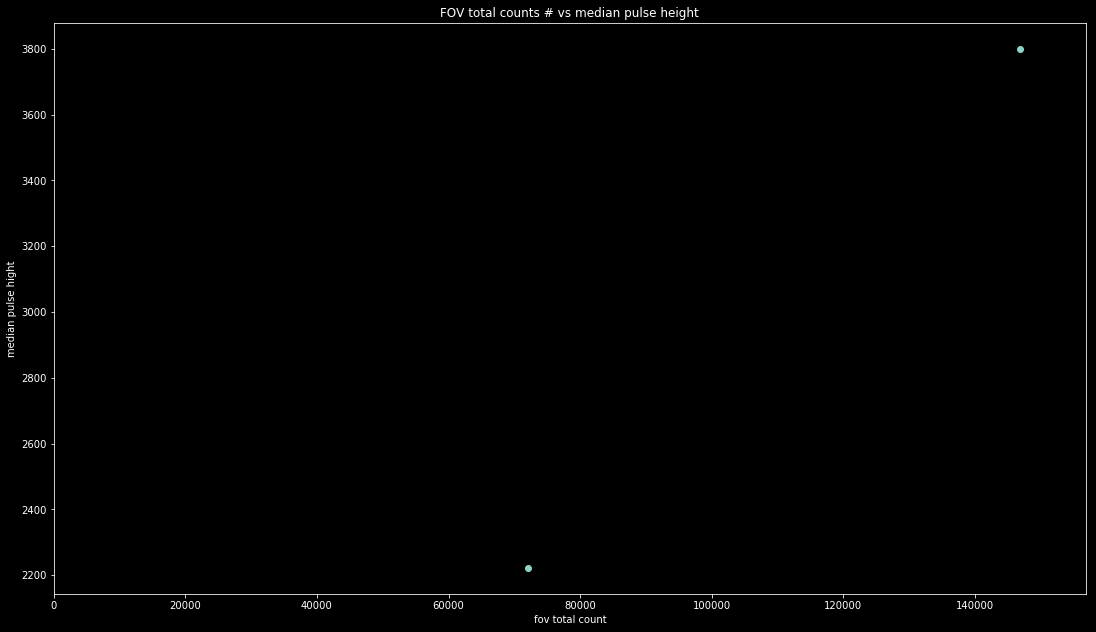

In [102]:
#fov_counts = [72060, 145200, 224373, 314438, 372791]
#pulse_heights = [2222, 3800, 4372, 5273, 5908]
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.title('FOV total counts # vs median pulse height')
plt.scatter(fov_counts, pulse_heights)
plt.gca().set_xlabel('fov total count')
plt.gca().set_ylabel('median pulse hight')
plt.gcf().set_size_inches(18.5, 10.5)
plt.xlim(0, max(fov_counts)+10000)
#plt.xlim(min(fov_counts)-10000, max(fov_counts)+10000)
plt.savefig(os.path.join(plot_dir, 'fov_vs_mph.jpg'))